In [1]:
from production import Worldline, local_move, Problem, ExactSolver
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
rng = np.random.default_rng(7)

In [30]:
pb = Problem(
    n_sites=8,
    J_x=10.0,
    J_z=1.0,
    temperature=1,
    m=10
)
np.tanh(pb.delta_tau * pb.J_x / 2), pb.delta_tau


(np.float64(0.46211715726000974), 0.1)

In [31]:
solver = ExactSolver(pb)
solver.energy.real

np.float64(-0.6948053425437238)

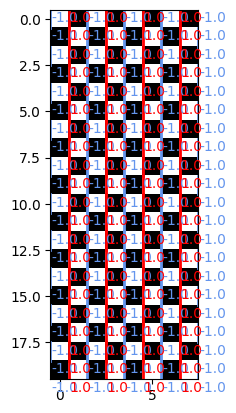

In [32]:
spins = np.ones((2*pb.m, pb.n_sites))
for i in range(0, pb.n_sites, 2):
    spins[:, i] *= -1

wl = Worldline(pb, spins)
wl.draw()

Burning phase...done


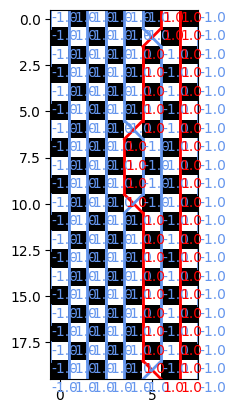

In [33]:
print("Burning phase...", end="")
for _ in range(5000):
    local_move(wl, rng)
print("done")
wl.draw()

  0%|          | 0/3000 [00:00<?, ?it/s]

-18.868422870577472


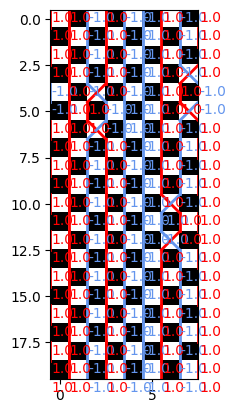

In [34]:
n_cycles = 3_000
length_cycle = 2 * pb.m * pb.n_sites
energies = np.zeros(n_cycles)
weights = np.zeros(n_cycles)

for i in tqdm(range(n_cycles)):
    for _ in range(length_cycle):
        local_move(wl, rng)
    energies[i] = wl.compute_energy()
    weights[i] = wl.compute_weight()

energy = np.sum(energies * weights) / np.sum(weights)
print(energy)
wl.draw()